In [17]:
import json
import numpy as np

In [2]:
NAME = 'restaurants'
# NAME = 'beautyspa'
datapath = '../../data_recsys/'
path = datapath + NAME + '/'

In [3]:
#get data
r_file = path+'/specific_reviews_test_predictions.json'
    
testReviews = list()
for counter, line in enumerate(open(r_file,'r')):
    if not counter%1000:
        print('%d reviews loaded'%counter)
    testReviews.append(json.loads(line.strip()))
print('Reviews loaded')

0 reviews loaded
1000 reviews loaded
2000 reviews loaded
3000 reviews loaded
4000 reviews loaded
5000 reviews loaded
6000 reviews loaded
7000 reviews loaded
8000 reviews loaded
9000 reviews loaded
10000 reviews loaded
11000 reviews loaded
12000 reviews loaded
13000 reviews loaded
Reviews loaded


In [4]:
print((testReviews[1]['exPredFeatures']))

{'FOOD_FOOD_SIDE_VEGETABLES': [1, 0.6185078460920737, 0.7385057400644289, 0.3182, 1, 0], 'RESTAURANT_INTERIOR': [0, 0.46460283293028737, 0.5825003632655384, 0.3182, 1, 0], 'FOOD_FOOD_DISH': [0, 0.38458654924112756, 0.7610086267383518, 0.2273, 1, 0], 'FOOD_FOOD_SIDE': [1, 0.6297146470509695, 0.7473943905854881, 0.5909, 1, 0], 'FOOD_FOOD_DESSERT': [0, 0.447642103252078, 0.27806020350480987, 0.1364, 1, 0], 'FOOD_SELECTION': [0, 0.6075663547162022, 0.683537450288091, 0.2727, 1, 0], 'FOOD_MEALTYPE_MAIN': [0, 0.4493721204243403, 0.09340332477397928, 0.1364, 1, 0], 'FOOD_FOOD_MEAT': [0, 0.37199693536678374, 0.37291401394632473, 0.2727, 1, 0], 'FOOD_FOOD_SEAFOOD': [0, 0.571409082818452, 0.52093285015853, 0.40909999999999996, 1, 0], 'DRINKS': [0, 0.3768379997361376, 0.4218597562684472, 0.1364, 1, 0], 'SERVICE': [0, 0.6462665892779721, 0.666777588768683, 0.5455, 1, 0], 'FOOD_FOOD_CHICKEN': [1, 0.48880106741621937, 0.22650568514508418, 0.2727, 1, 0], 'DRINKS_NON-ALCOHOL': [0, 0.47337780866437384,

Populating the interactive namespace from numpy and matplotlib


/Users/konstantinbauman/anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:423: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


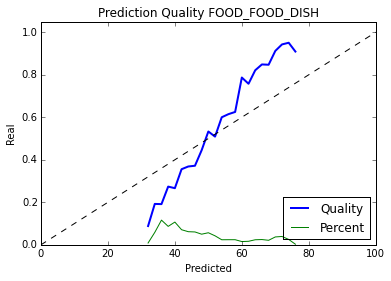

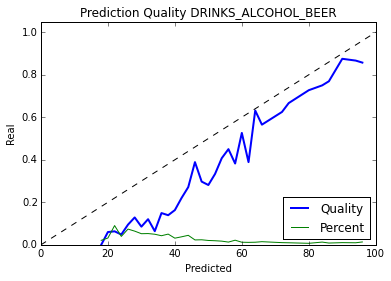

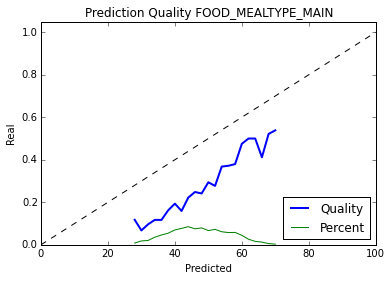

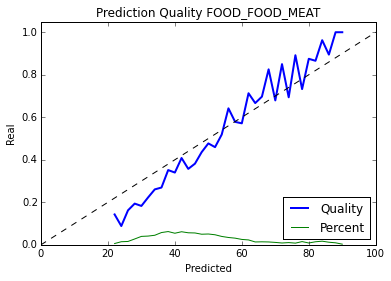

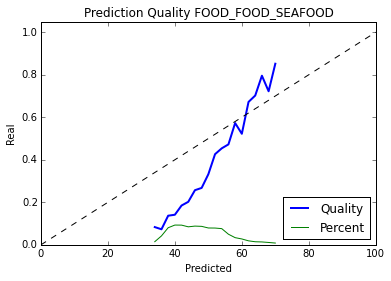

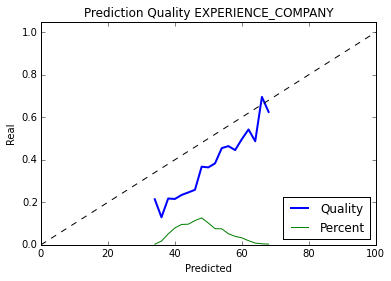

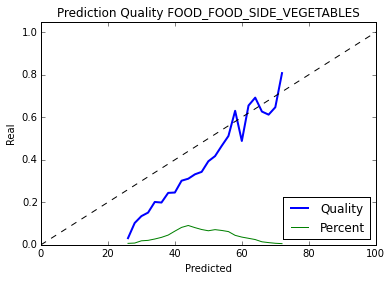

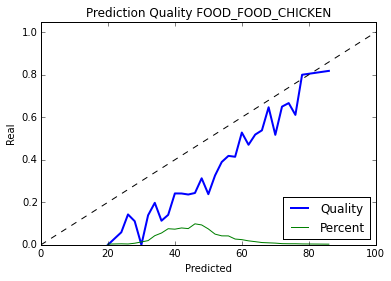

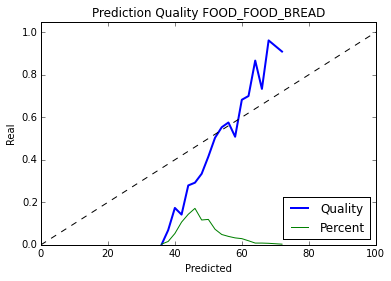

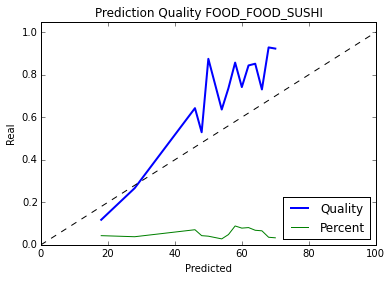

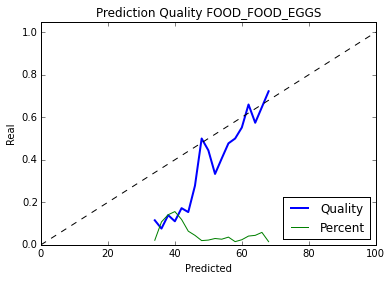

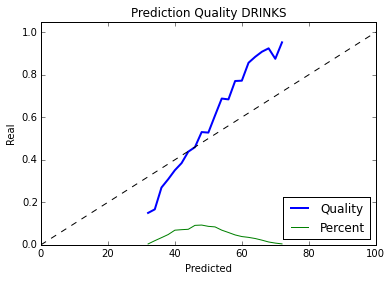

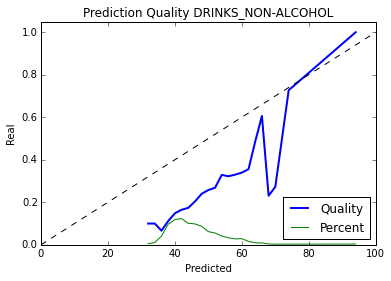

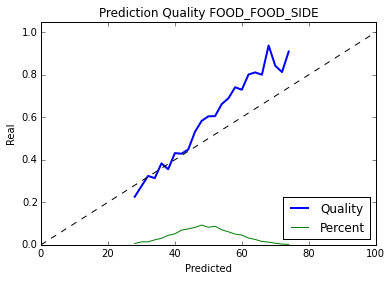

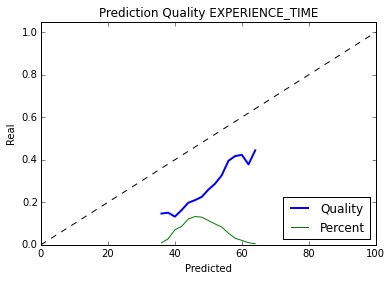

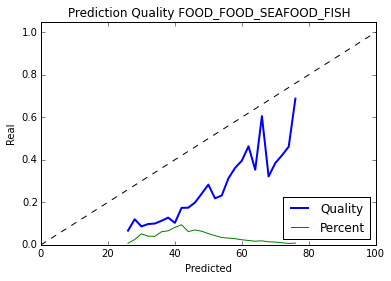

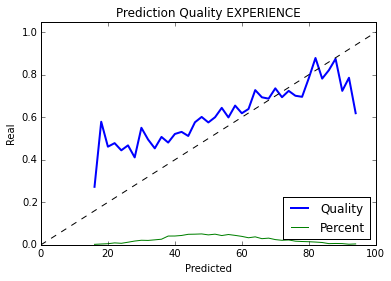

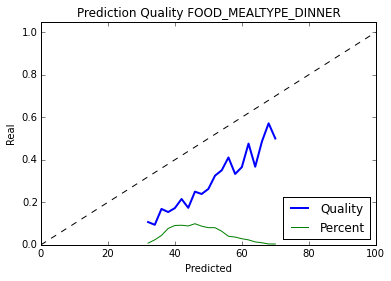

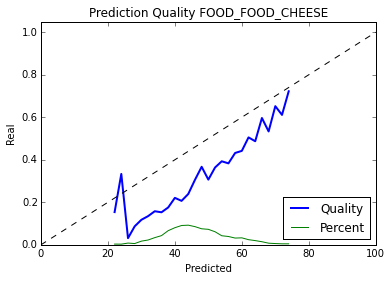

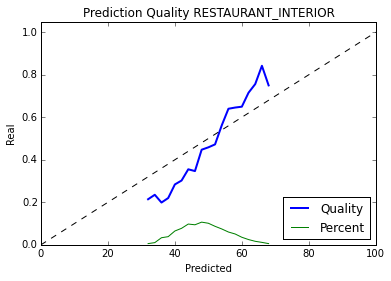

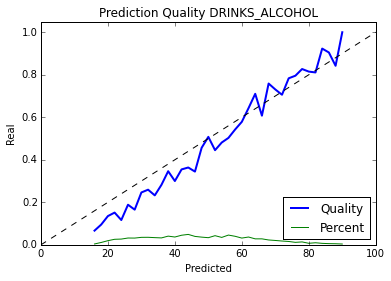

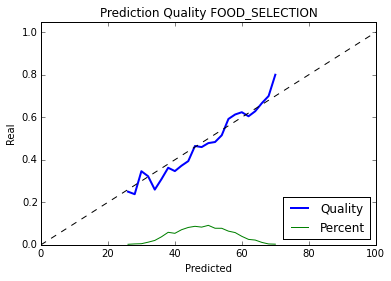

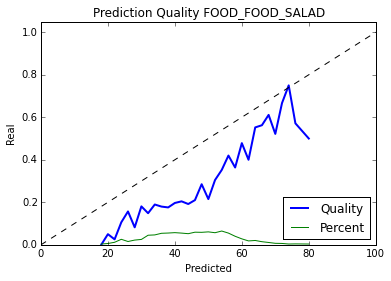

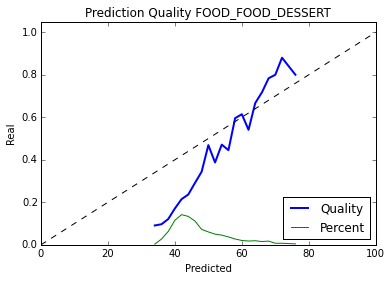

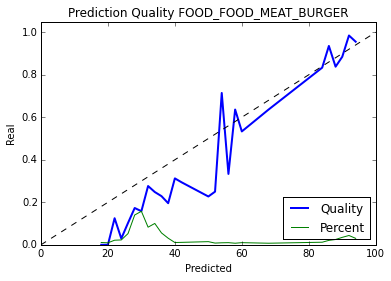

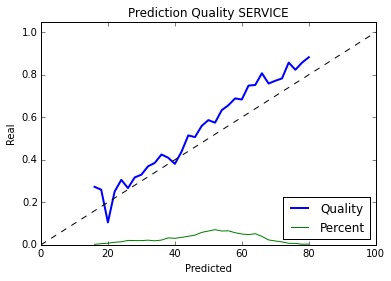

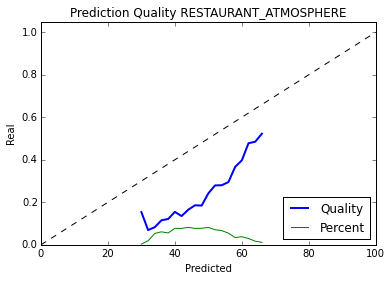

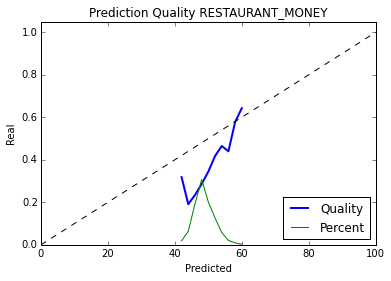

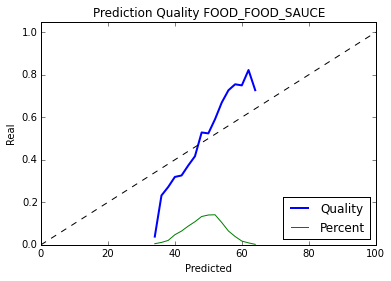

In [16]:
%pylab inline
import matplotlib.pyplot as plt

from utils.featuresStructure import featureStructureWorker

result = list()

fsw = featureStructureWorker()
for k, feature in enumerate(fsw.featureIdicator):#enumerate(['FOOD_FOOD_SIDE']):#
    feature_result = [[] for x in range(101)]
    for review in testReviews:
        if 'exPredFeatures' not in review:
            continue
        if feature in review['exPredFeatures']:
            existence = review['exPredFeatures'][feature][0]
            prediction = 2*int(50*review['exPredFeatures'][feature][1])
            feature_result[prediction].append(existence)
#     print(feature_result)
#     print(len(feature_result))
#     for j in range(101):
#         print(j,len(feature_result[j]),)
    
    x = list()
    y = list()
    z = list()
    c = sum([len(k) for k in feature_result])
    for i in range(len(feature_result)):
        if len(feature_result[i]) > 10:
            x.append(i)
            y.append(np.average(feature_result[i]))
            z.append(len(feature_result[i])/c)
        
#     print(feature_result)
    if len(x) < 3:
        continue
    plt.figure()
    plt.plot(x,y, linewidth=2.0, label='Quality')
    plt.plot(x,z, linewidth=1.0, label='Percent')
    plt.plot([0, 100], [0, 1], 'k--')
    plt.xlim([0.0, 100.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.title('Prediction Quality %s'%feature)
    plt.legend(loc="lower right")
#     plt.show()
    plt.savefig(path+'plots/%s.png'%feature)
#     break